In [15]:

#  Cell 1: Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [11]:

# Load dataset 
df = pd.read_csv(r"C:\Users\USER\Desktop\Pro1\Beijing Multisite air Quality data.csv")
print("Dataset loaded. Shape:", df.shape)
display(df.head())



Dataset loaded. Shape: (420768, 17)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [17]:

# --- Cell: Basic exploration ---
# Check basic info
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# If dataset has a date/time column, try to parse it. Common column names: 'date', 'time', 'datetime', 'year', 'month', 'day', 'hour'
possible_datetime_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower() or 'year' in c.lower()]
print("Possible datetime columns:", possible_datetime_cols)

# Example: if columns year, month, day, hour exist, build a datetime:
if set(['year','month','day','hour']).issubset(df.columns):
    df['datetime'] = pd.to_datetime(df[['year','month','day','hour']].astype(str).agg('-'.join, axis=1), errors='coerce')
    print("Constructed datetime column from year/month/day/hour.")
elif possible_datetime_cols:
    # attempt to parse the first matching column
    dtcol = possible_datetime_cols[0]
    try:
        df['datetime'] = pd.to_datetime(df[dtcol], errors='coerce')
        print(f"Parsed datetime from column: {dtcol}")
    except Exception as e:
        print("Could not parse datetime automatically:", e)

# Show basic statistics for numeric columns
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB
None

Missing values per column:
 year           0
month          0
day            0

C:\Users\USER\AppData\Local\Temp\ipykernel_17092\2518259754.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df[['year','month','day','hour']].astype(str).agg('-'.join, axis=1), errors='coerce')


Constructed datetime column from year/month/day/hour.


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,245448
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 16:30:00
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 10:00:00
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 13:00:00
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 16:30:00
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 20:00:00
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


In [9]:

# Cell: Cleaning & feature engineering ---
target_col = None
for col in ['PM2.5','pm2.5','pm25','pm_2_5']:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    raise ValueError("Target PM2.5 column not found. Please ensure your CSV has a pm2.5 column (common names: 'pm2.5', 'PM2.5').")

print("Detected target column:", target_col)

# Keep common features if present
candidate_features = ['DEWP','TEMP','PRES','Iws','Is','Ir','cbwd','cbwd_deg','Iprec']  # extend if your dataset differs
features = [c for c in candidate_features if c in df.columns]
print("Available candidate features:", features)

# Drop rows where target is missing
df = df.dropna(subset=[target_col]).copy()

# Simple missing value handling: fill numeric with median
for c in features:
    if df[c].dtype.kind in 'biufc':  # numeric
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].fillna('missing')

# Categorical encoding for cbwd (wind direction)
if 'cbwd' in df.columns:
    df = pd.get_dummies(df, columns=['cbwd'], prefix='wd')

# If datetime exists, add basic time features
if 'datetime' in df.columns and not df['datetime'].isnull().all():
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    for tcol in ['hour','day','month']:
        if tcol not in features:
            features.append(tcol)

# Final features list (only numeric columns)
X_cols = [c for c in df.columns if c != target_col and (df[c].dtype.kind in 'biufc')]
print("Final numeric feature columns used:", X_cols[:20])
display(df[X_cols + [target_col]].head())


Detected target column: PM2.5
Available candidate features: ['DEWP', 'TEMP', 'PRES']
Final numeric feature columns used: ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5
0,2013,NaN,NaN,NaN,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,4.0
1,2013,NaN,NaN,NaN,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,8.0
2,2013,NaN,NaN,NaN,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,7.0
3,2013,NaN,NaN,NaN,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,6.0
4,2013,NaN,NaN,NaN,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,3.0


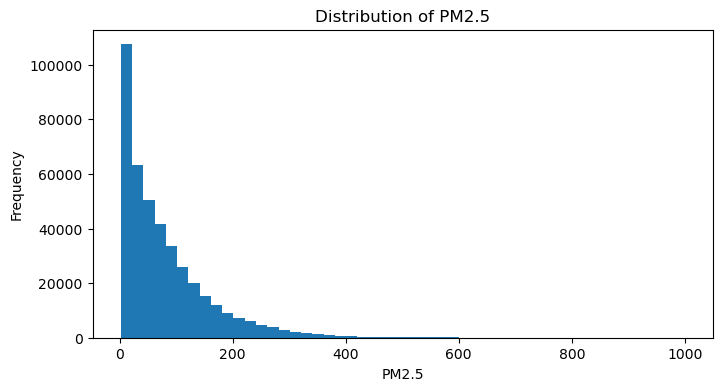

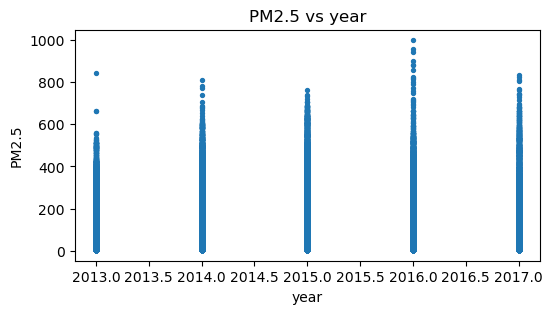

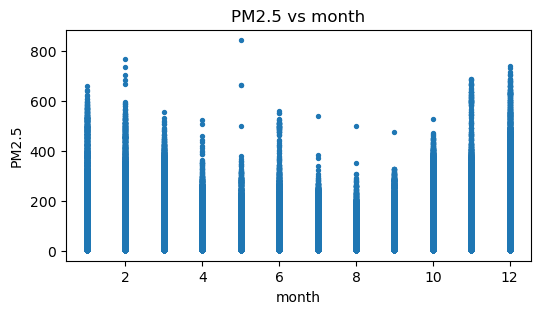

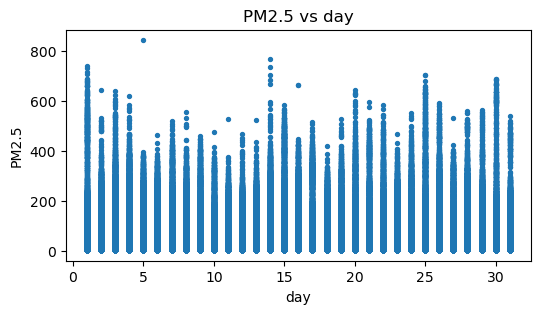

In [12]:

#  Cell: Visualization 
# Target distribution
plt.figure(figsize=(8,4))
plt.hist(df[target_col].dropna(), bins=50)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

# Scatter plots with top 3 numeric features
numeric_feats = [c for c in X_cols if df[c].dtype.kind in 'biufc'][:3]
for c in numeric_feats:
    plt.figure(figsize=(6,3))
    plt.scatter(df[c], df[target_col], s=8)
    plt.xlabel(c)
    plt.ylabel(target_col)
    plt.title(f"{target_col} vs {c}")
    plt.show()


In [15]:

# Cell: Modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare X and y
X = df[X_cols].fillna(0).values
y = df[target_col].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize for linear regression (not needed for tree models but fine)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = mean_squared_error(y_test, y_pred_lr) 
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression -> RMSE: {:.3f}, R2: {:.3f}".format(rmse_lr, r2_lr))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)  # tree-based model uses unscaled features fine
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest -> RMSE: {:.3f}, R2: {:.3f}".format(rmse_rf, r2_rf))


Linear Regression -> RMSE: 1052.193, R2: 0.839
Random Forest -> RMSE: 349.024, R2: 0.947


In [17]:

#  Cell: Feature importance & results
# Feature importances
try:
    importances = rf.feature_importances_
    feat_names = [f'feat_{i}' for i in range(X.shape[1])]
    # If X_cols list is available with names, use it
    try:
        feat_names = X_cols
    except Exception:
        pass

    feat_imp = sorted(zip(feat_names, importances), key=lambda x: x[1], reverse=True)[:10]
    print("Top feature importances (Random Forest):")
    for name, val in feat_imp:
        print(f"{name}: {val:.4f}")
except Exception as e:
    print("Could not compute feature importances:", e)

print("\nSummary:")
print(f"Linear Regression RMSE: {rmse_lr:.3f}, R2: {r2_lr:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}, R2: {r2_rf:.3f}")


Top feature importances (Random Forest):
PM10: 0.7981
CO: 0.0990
DEWP: 0.0196
SO2: 0.0152
TEMP: 0.0134
PRES: 0.0106
NO2: 0.0101
O3: 0.0084
year: 0.0066
WSPM: 0.0062

Summary:
Linear Regression RMSE: 1052.193, R2: 0.839
Random Forest RMSE: 349.024, R2: 0.947
